# Linear regression with one variable

In this practical session, we will learn how to carry out univariate linear regression using `scikit-learn`. While working on this practical, keep in mind that what you are trying to do is to create a linear model (hypothesis function $f$ with parameters $\theta_0$ and $\theta_1$) that allows us to accurately predict an outcome (dependent variable, $y$) based on some known data (independent variable $x$).

![](./images/linearModel.png)

Loading data
=====================================================
 In order to create the model, you need some training data to start with. We will be working with a data set which is available within the `scikit` library and which is often used for learning purposes. This data set is called the diabetes dataset. It contains data with 10 predictor variables: age, sex, body mass index (BMI), average blood pressure, and six blood serum measurements (tc, ldl-Cholesterol, hdl-Cholesterol,  tch,  ltg and glucose) for n = 442 diabetes patients (instances). The dependent variable (outcome or response of interest) is a quantitative (numeric) measure of disease progression one year after baseline. Notice that the features have been normalized, so for instance for the age feature you don't see tradional ages in years but rather numbers between -1 and 1, which reflect a specific patient deviation from the mean age of all the patients (a large positive value  indicates someone relatively old in comparison to the average age of the participants and a large negative value indicates someone relatively young with respect to the average age of all participants. Someone with exactly an age equal to the average age for all 442 patients would have a numeric value for the age feature of 0). The task at hand will be to predict disease progression ($y$) from a single physiological variable (a single column in $X$). We load the dataset 'diabetes' using the sklearn load function: 

In [1]:
from sklearn import datasets
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

The dataset consists of data $X$ (a matrix with 442 rows, a row for each patient, and the 10 predictor independent variables, a column for each independent variable) and the targets $y$ (The outcome or quantitative measurement of disease progression, i.e. the dependent variable). The target tells us what is the output for a specific example from the data. Study the dimensions of the X matrix and the y vector and try to reflect on what they mean. 

In [2]:
X = diabetes.data
y = diabetes.target
print(X.shape)
print(y.shape)

(442, 10)
(442,)


For illustration purposes, let's print out the first 3 predictor variables for the first 10 patients in the data (i.e. feature matrix $X$)

In [3]:
print(X[0:10,0:3])

[[ 0.03807591  0.05068012  0.06169621]
 [-0.00188202 -0.04464164 -0.05147406]
 [ 0.08529891  0.05068012  0.04445121]
 [-0.08906294 -0.04464164 -0.01159501]
 [ 0.00538306 -0.04464164 -0.03638469]
 [-0.09269548 -0.04464164 -0.04069594]
 [-0.04547248  0.05068012 -0.04716281]
 [ 0.06350368  0.05068012 -0.00189471]
 [ 0.04170844  0.05068012  0.06169621]
 [-0.07090025 -0.04464164  0.03906215]]


Please realize that the targets in $y$ are a quantitative measurement of disease progression. An instance/row/patient in the data with a high value of $y$, means someone whose diabetes has progressed a lot (as measured by physiological changes). On the contrary, someone with a low value of $y$ indicates a patient whose disease has not progressed much. To clarify, let's print the quantitative measurement of disease progression contained in $y$ for the first 10 patients in the data.

In [4]:
print(y[0:10])

[ 151.   75.  141.  206.  135.   97.  138.   63.  110.  310.]


So according to the data, a year after the study began, patient 2 is doing quite well while patient 10 is not doing very well (i.e. his/her condition has worsen a lot)

### Splitting the data

We want to split the data into a trainning set and a test set. We fit the linear model on the trainning set, and we will show how it performs on the test set. Testing the performance of our model using the training set would be equivalent to cheating  because the model has already seen the training data. To be fair, we need to test the performance of the model on data that the model has never seen during training.

Before splitting the data, we shuffle (mix) the examples, because for some datasets the examples are ordered and that can create problematic effects in the training procedure. 

If we wouldn't shuffle, train set and test set could be totally different (imagine a data set ordered by age), thus a linear model fitted on the trainning set (young people) might not be valid on the test set (old people). Hence, we shuffle:

In [4]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=1)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


Each instance of data in $X$ has 10 columns in total.

We want to work with just 1 of those columns (1-dimensional data) because it is simple to visualize and because we have been studying univariate linear regression, i.e. predicting a dependent variable using a single independent variable (in a future session we will study multivariable linear regression). Therefore, we select <span style="color:red">**ONLY ONE COLUMN**</span> from the $X$ matrix, e.g a column with index 2, and fit a linear model on it. Fitting means finding the parameters $\theta_0$ and $\theta_1$, of the linear equation, $y=\theta_0 + \theta_1 x$, that better describes the data $X[2]$ and $y$.

![](./images/m.png)

Notice in the code below how our feature matrix $X$ changes from 10 predictors to only 1:

In [5]:
print(X.shape)
# Extract just one column from data
X = X[:, 2] #Take all the rows in X but only the column with index 2
print(X.shape)

(442, 10)
(442,)


Finally, we can split the data into training and testing sets. This is because we want to create a model using the training data and test its prediction accuracy on some testing data. Since we only have one data set, we need to split it into 2 sets: a training set and a test set. 

![](./images/t.png)

In [6]:
train_set_size = 250
X_train = X[:train_set_size]  # selects first 250 rows (examples) for train set
X_test = X[train_set_size:]   # selects from row 250 until the last one for test set
print(X_train.shape)
print(X_test.shape)

(250,)
(192,)


Split the target vector $y$ also into training/testing sets

In [7]:
y_train = y[:train_set_size]   # selects first 250 rows (targets) for train set
y_test = y[train_set_size:]    # selects from row 250 until the last one for test set
print(y_train.shape)
print(y_test.shape)

(250,)
(192,)


Now we can look at our trainning data. We can visually see ourselves that the data examples have a linear relation. Therefore, we can try to find a linear model using linear regression which is able to make good predictions on our test data examples.

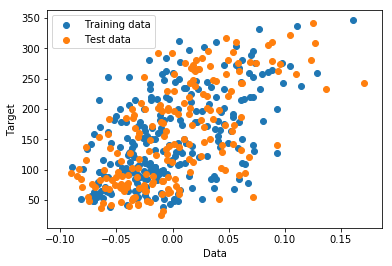

In [15]:
%matplotlib inline
#Recall you don't need the previous line if working on an IDE
import pylab as plt
trainingDataScatterPlot=plt.scatter(X_train, y_train) # blue dots
testDataScatterPlot=plt.scatter(X_test, y_test) # Orange dots
plt.xlabel('Data')
plt.ylabel('Target')
plt.legend((trainingDataScatterPlot,testDataScatterPlot),("Training data","Test data"));

## Think about

Instead of plotting the feature contained in column 2 of the data matrix $X$, try to plot feature in column 4. Is there a linear relationship in the data? before you move to the next section, replot the data for feature 2 so you will be using the appropriate feature for the code that follows.

Linear regression
=================
Creating a linear regression object is very easy with scikit-learn. First, we import the linear model module and instantiate the class `LinearRegression`. The variable we named `linearRegressionModel` will contain our model:

In [16]:
from sklearn import linear_model
linearRegressionModel = linear_model.LinearRegression()

Now we are going to fit the model using the training set. This method carries out an estimation of the parameters of the linear model $\theta_0$ and $\theta_1$ that minimizes the sum of the squares from the training data points to the model (a line in this one-dimensional case):

![](./images/mss.png)

In [20]:
"""
Passing 1d arrays as data in scikitlearn  is deprecated in 0.17 and will raise ValueError in 0.19.
Hence we need to reshape the data either using X.reshape(-1, 1) if data has a single feature (our case) or X.reshape(1, -1) 
if it contains a single sample
"""
linearRegressionModel.fit(X_train.reshape(-1, 1), y_train);

Our machine learning library scikit-learn has now found the coefficient $\theta_1$ (slope) and the bias $\theta_0$ (the intercept) of our linear model $f(x)$. We can print the optimal $\theta_1$ and $\theta_0$ parameters estimated by our machine learning library:

In [21]:
print(linearRegressionModel.coef_) #theta 1
print(linearRegressionModel.intercept_) #theta 0

[865.04619508]
151.17916972766434


Now we calculate the mean square error on the test set, i.e. The sum of the distances from the model predictions (the line $f(x)$) to the  test data instances. That is, $J(\theta_0,\theta_1)=\frac{1}{2m}\sum_{k=1}^m(h_\theta(x_i)-y_i)^2$), where m is the size of the test set.

In [22]:
import numpy as np
# The mean square error
print("Training error: ", np.mean((linearRegressionModel.predict(X_train.reshape(-1, 1)) - y_train) ** 2))
print("Test     error: ", np.mean((linearRegressionModel.predict(X_test.reshape(-1, 1)) - y_test) ** 2))

Training error:  3800.1408249628944
Test     error:  4047.242996701056


Notice that with the model stored in the variable `linearRegressionModel` (the equation of the line $y=f(x)$ with parameters $\theta_0$ and $\theta_0$), we can now predict the output variable $y$, using some new data point, a patient with feature 2 equal 0.04:

In [24]:
linearRegressionModel.predict(0.04) 

array([185.78101753])

The above number indicates the estimated $y$ ( a quantitative measure of disease progression) that our model predicts given the test data (patient) with value of feature $x=0.04$:

Plotting the linear model
==============================
Now we want to plot a visualization of our model $f(x)$ together with the trainning data and the targets (marked as dots). 
The red line below represents the estimated model based on the training data. This model allows us to carry out predictions on the test data or new data altogether as shown above. The red line (linear model that we found) it's just an equation of the line parameterized by $\theta_0$ and $\theta_1$ (`linearRegressionModel.intercept_` and `linearRegressionModel.coef_` (slope) respectively):

The straight line model can be seen in the plot further down, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares (SSE) between the observed responses in the dataset, and the responses predicted by the linear approximation. The coefficients, the residual sum of squares and the variance score are also calculated by the algorithm.

Text(0,0.5,'Target')

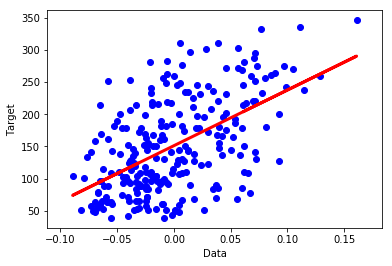

In [25]:
# Visualises dots, where each dot represent a data exaple and corresponding target
plt.scatter(X_train, y_train,  color='blue')
# Plots the linear model
plt.plot(X_train, linearRegressionModel.predict(X_train.reshape(-1, 1)), color='red', linewidth=3);
plt.xlabel('Data')
plt.ylabel('Target')

We can also visualize the test data, and show that the linear model that we estimated is valid for the test set as well:

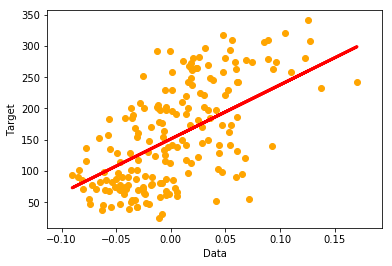

In [26]:
# Visualises dots, where each dot represent a data exaple and corresponding teacher
plt.scatter(X_test, y_test,  color='orange')
# Plots the linear model
plt.plot(X_test, linearRegressionModel.predict(X_test.reshape(-1, 1)), color='red', linewidth=3);
plt.xlabel('Data')
plt.ylabel('Target');

## Estimating how good/bad our model is

It is apparent that our model does not capture all the variability in the data (i.e. the information contained in $x$ does not allow to perfectly predict $y$). That would only happen if all the dots would be superimposed in the red line. However imperfect, it should also be obvious to you that the information contained in $x$ does helps us in approximating an estimation of $y$. Given a value of $x$ for a dot, the red line estimated $y$ value is often close to the real $y$ value associated with the dot in the test data. We can estimate the proportion of variation $R^2$ in $y$ explained by $x$ (a measurement of the predictive ability of our estimated linear regression model) using the following method:

In [21]:
print(linearRegressionModel.score(X_test.reshape(-1, 1), y_test))

0.385927476068


That is, almost 40% of the variance in $y$ (disease progression) can be predicted from our single physiological feature $x$.

## Exercise 1
Generate linear models for each one of the feature parameters in the data set. Keep track of $R^2$ or mean square error on the test set for different features, and try to find the feature that minimizes the estimation error, i.e. maximizes $R^2$.

## Exercise 2
Let's generate some artificial data simulating the price $y$ of 2nd hand cars, as a function of their mileage $x$ (provided in units of thousand km).

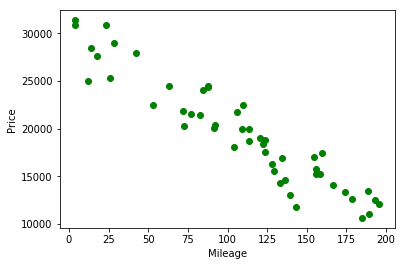

In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.random.seed(0)
r=50
xRange=200
X = xRange*np.random.random(size=(r, 1))
noise = 20
yRange=30000
y = yRange - 100*(X.squeeze() + (noise * np.random.randn(r)))
plt.plot(X, y, 'o', color='green');
plt.xlabel('Mileage')
plt.ylabel('Price');

Your task is to carry out linear regression on the available data $X$ and $y$. That is, to use scikit-learn to find out the right parameters $\theta_0$ and $\theta_1$ of the equation $y=\theta_0 + \theta_1x$ (i.e. $f(x)$) that better fit the data in $X$ and $y$.

1. Create a linear regression model and fit the data
2. Plot your linear regression model using a red line and the data contained in X
3. What is the price at your model predicts for a car with 125,000km mileage? with 200,000km? with 30,000?
4. How much of the variance in $y$ does your model predict based on the information contained in $X$?


## Exercise 3
the next code snippet provides you with the population (in millions) of New Zealand in several years. Create a linear model of the data and answer the following questions:

1. According to your linear model, what will be the population of New Zealand in the year 2027?
2. According to your linear model, in what year will the population of New Zealand reach the 6 million mark?
3. In your own words, can you speculate about the limitations of the linear model?

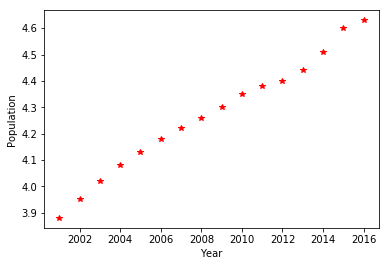

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#if I simply use a normal list data type an error occurs when fitting the linear regression, so I reshape to -1,1
X = np.array([2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,]).reshape(-1,1)
 
y = np.array([3.88,3.95,4.02,4.08,4.13,4.18,4.22,4.26,4.30,4.35,4.38,4.40,4.44, 4.51,4.60,4.63]).reshape(-1,1)
 
plt.plot(X,y,'r*')
plt.xlabel('Year')
plt.ylabel('Population');